# Task for Today  

***

## Age Prediction From Facial Images  

Given *images of people ages 20-50*, let's try to predict the **age** of the person in a given image.

We will use a TensorFlow/Keras CNN to make our predictions.

In [15]:
# Getting Started

In [16]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [17]:
image_dir = Path('/kaggle/input/age-prediction/20-50')

# Create File DataFrame

In [18]:
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)
ages = pd.Series(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name='Age').astype(np.int)

images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [19]:
images

,Filepath,Age
0,/kaggle/input/age-prediction/20-50/20-50/test/...,38
1,/kaggle/input/age-prediction/20-50/20-50/train...,39
2,/kaggle/input/age-prediction/20-50/20-50/train...,30
3,/kaggle/input/age-prediction/20-50/20-50/train...,42
4,/kaggle/input/age-prediction/20-50/20-50/train...,35
...,...,...
40435,/kaggle/input/age-prediction/20-50/20-50/train...,47
40436,/kaggle/input/age-prediction/20-50/20-50/train...,21
40437,/kaggle/input/age-prediction/20-50/20-50/test/...,21
40438,/kaggle/input/age-prediction/20-50/20-50/train...,23


In [30]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns

In [31]:
images.head()

,Filepath,Age
0,/kaggle/input/age-prediction/20-50/20-50/test/...,38
1,/kaggle/input/age-prediction/20-50/20-50/train...,39
2,/kaggle/input/age-prediction/20-50/20-50/train...,30
3,/kaggle/input/age-prediction/20-50/20-50/train...,42
4,/kaggle/input/age-prediction/20-50/20-50/train...,35


In [35]:
def visualize(image):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.imshow(image)



Age: 37


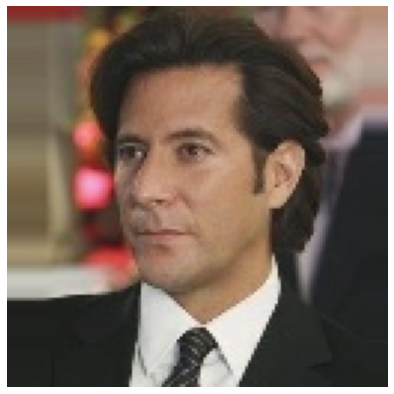

In [34]:
#choose an image id to see its age
image_id = 100
image_example_path = images.iloc[image_id].Filepath
age = images.iloc[image_id].Age

print(f'Age: {age}')
image = cv2.imread(image_example_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '20'),
  Text(1, 0, '21'),
  Text(2, 0, '22'),
  Text(3, 0, '23'),
  Text(4, 0, '24'),
  Text(5, 0, '25'),
  Text(6, 0, '26'),
  Text(7, 0, '27'),
  Text(8, 0, '28'),
  Text(9, 0, '29'),
  Text(10, 0, '30'),
  Text(11, 0, '31'),
  Text(12, 0, '32'),
  Text(13, 0, '33'),
  Text(14, 0, '34'),
  Text(15, 0, '35'),
  Text(16, 0, '36'),
  Text(17, 0, '37'),
  Text(18, 0, '38'),
  Text(19, 0, '39'),
  Text(20, 0, '40'),
  Text(21, 0, '41'),
  Text(22, 0, '42'),
  Text(23, 0, '43'),
  Text(24, 0, '44'),
  Text(25, 0, '45'),
  Text(26, 0, '46'),
  Text(27, 0, '47'),
  Text(28, 0, '48'),
  Text(29, 0, '49'),
  Text(30, 0, '50')])

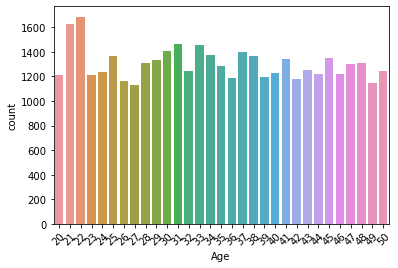

In [38]:
sns.countplot(images.Age)
plt.xticks(rotation = 45)

In [20]:
# Let's only use 5000 images to speed up training time
image_df = images.sample(40000, random_state=1).reset_index(drop=True)

train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

# Loading Images

In [21]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [22]:
train_df

,Filepath,Age
8224,/kaggle/input/age-prediction/20-50/20-50/test/...,35
11219,/kaggle/input/age-prediction/20-50/20-50/train...,29
17353,/kaggle/input/age-prediction/20-50/20-50/train...,46
15305,/kaggle/input/age-prediction/20-50/20-50/train...,25
30147,/kaggle/input/age-prediction/20-50/20-50/train...,33
...,...,...
7813,/kaggle/input/age-prediction/20-50/20-50/train...,24
32511,/kaggle/input/age-prediction/20-50/20-50/train...,24
5192,/kaggle/input/age-prediction/20-50/20-50/train...,25
12172,/kaggle/input/age-prediction/20-50/20-50/train...,39


In [23]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Age',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Age',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Age',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=False
)

Found 22400 validated image filenames.
Found 5600 validated image filenames.
Found 12000 validated image filenames.


# Training

In [24]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
700/700 [==============================] - 185s 264ms/step - loss: 307.7108 - val_loss: 83.5374
Epoch 2/100
700/700 [==============================] - 38s 54ms/step - loss: 82.1941 - val_loss: 81.2488
Epoch 3/100
700/700 [==============================] - 38s 55ms/step - loss: 83.8109 - val_loss: 83.4369
Epoch 4/100
700/700 [==============================] - 37s 53ms/step - loss: 80.7440 - val_loss: 87.7001
Epoch 5/100
700/700 [==============================] - 39s 56ms/step - loss: 81.4192 - val_loss: 80.0140
Epoch 6/100
700/700 [==============================] - 38s 54ms/step - loss: 81.2859 - val_loss: 80.3567
Epoch 7/100
700/700 [==============================] - 37s 53ms/step - loss: 83.0082 - val_loss: 80.0840
Epoch 8/100
700/700 [==============================] - 37s 52ms/step - loss: 81.4210 - val_loss: 81.2428
Epoch 9/100
700/700 [==============================] - 37s 53ms/step - loss: 81.1535 - val_loss: 79.7349
Epoch 10/100
700/700 [==============================

In [39]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 120, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 118, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 59, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112

In [25]:
import plotly.express as px
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Model"
)

fig.show()

# Results

In [26]:
predicted_ages = np.squeeze(model.predict(test_images))
true_ages = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
print("     Test RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_ages, predicted_ages)
print("Test R^2 Score: {:.5f}".format(r2))

     Test RMSE: 8.80780
Test R^2 Score: 0.02568


We can see that our model is not even better than the null/baseline model (predict mean every time)!

In [43]:
null_rmse = np.sqrt(np.sum((true_ages - np.mean(true_ages))**2) / len(true_ages))
print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

Null/Baseline Model Test RMSE: 8.92313


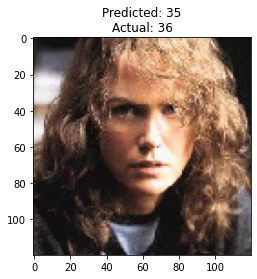

In [58]:
test_image = '../input/age-prediction/20-50/20-50/train/36/151081.jpg'
image_test = tf.keras.preprocessing.image.load_img(test_image, target_size=(120,120))
input_arr = np.array([tf.keras.preprocessing.image.img_to_array(image_test)]).astype('float32') / 255
predictions = model.predict(input_arr)

plt.figure()
plt.imshow(image_test)

predicted_age = predictions[0][0].astype(np.int32).astype(str)
actual_age = str(os.path.split(os.path.split(test_image)[0])[1])

plt.title('Predicted: ' + predicted_age + '\n' +
         'Actual: ' + actual_age)
# plt.title('Predicted: ' + predicted_age )

plt.show()

Age của ảnh: 22


In [29]:
model.save('modelV2.h5')